- Prepare the dataset

In [70]:
import pandas as pd
def Prepare_dataset(df: pd.DataFrame)->pd.DataFrame:
     
     try:
          
          return pd.DataFrame(df)
     
     except Exception as e:
          raise ValueError(f"Error: {e}")
          
     
     
df = {'Store':[1,2,3,4,5,6,7,8,9,10],
      'Emails Sent (Weekly)' : [50,30,70,40,60,
                                20,80,45,55,35],
      'Sales Revenue ($ Thousands)':[120,90,150,
                                     100,140,70,160,
                                     110,130,95]
      } 

data = Prepare_dataset(df)
data 
     

,Store,Emails Sent (Weekly),Sales Revenue ($ Thousands)
0,1,50,120
1,2,30,90
2,3,70,150
3,4,40,100
4,5,60,140
5,6,20,70
6,7,80,160
7,8,45,110
8,9,55,130
9,10,35,95


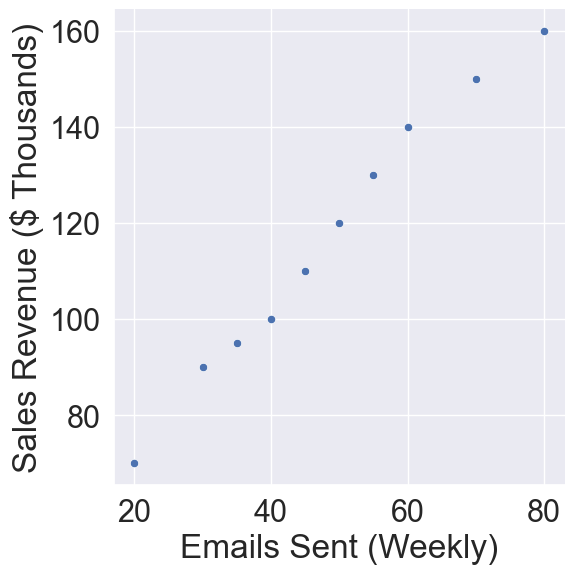

In [71]:
import matplotlib.pyplot as plt
def Pair_Plot(data: pd.DataFrame)->None:
     
     """
     Plot the
     Pair Plot
     
     """
     
     try:
          import seaborn as sns
          sns.set(font_scale= 2)
          sns.pairplot(data = data,
                       y_vars= ['Sales Revenue ($ Thousands)'],
                       x_vars= ['Emails Sent (Weekly)'],
                       height= 6
                       )
          
          plt.show()
          
     except FileNotFoundError:
          raise FileNotFoundError("Errors")
     
     except Exception as e:
          print(f"Errors: {e}")
          
Pair_Plot(data)

# Select Relavent columns
- Isolate X and y

In [72]:
def Relevant_Cols(data: pd.DataFrame)->pd.DataFrame:
     
     try:
          
          return data.filter(items = ['Emails Sent (Weekly)', 'Sales Revenue ($ Thousands)'])
     
     except Exception as e:
          raise ValueError(f"Error: {e}")
     
def Isolate_Cols(req_cols:pd.DataFrame)->pd.DataFrame:
     
     try:
          
          X = req_cols.iloc[:, 0:1]
          return X
     
     except Exception as e:
          raise ValueError(f"Error: {e}")
     


def Isolates_Cols(req_cols:pd.Series)->pd.DataFrame:
     
     try:
          
          y = req_cols['Sales Revenue ($ Thousands)'] 
          return y
     
     except Exception as e:
          raise ValueError(f"Error: {e}")
     
      
req_cols = Relevant_Cols(data)
req_cols


,Emails Sent (Weekly),Sales Revenue ($ Thousands)
0,50,120
1,30,90
2,70,150
3,40,100
4,60,140
5,20,70
6,80,160
7,45,110
8,55,130
9,35,95


In [73]:
X = Isolate_Cols(req_cols)
X

,Emails Sent (Weekly)
0,50
1,30
2,70
3,40
4,60
5,20
6,80
7,45
8,55
9,35


In [74]:
y = Isolates_Cols(req_cols)
y

0    120
1     90
2    150
3    100
4    140
5     70
6    160
7    110
8    130
9     95
Name: Sales Revenue ($ Thousands), dtype: int64

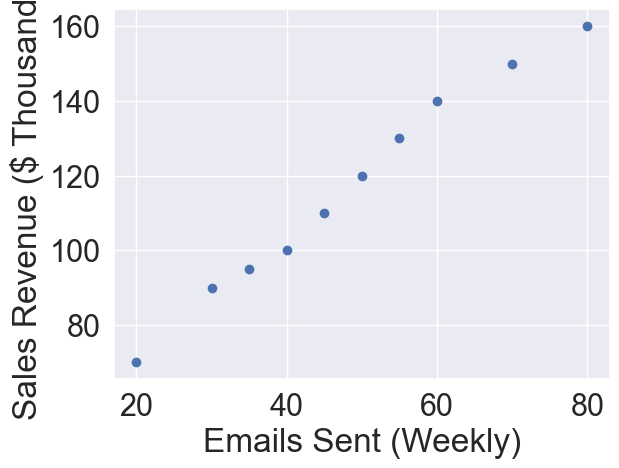

In [75]:
def Visualize(data:pd.DataFrame)->None:
     
     try:
          import matplotlib.pyplot as plt
          plt.scatter(data['Emails Sent (Weekly)'],
                      data['Sales Revenue ($ Thousands)'])
          
          plt.xlabel('Emails Sent (Weekly)')
          plt.ylabel('Sales Revenue ($ Thousands)')
          plt.show()
          
     except Exception as e:
          print(f"Error: {e}")
          
Visualize(data)

# Split them into train and test 

In [76]:
def Train_Test(X:pd.DataFrame, y:pd.Series):
     
     try:
          
          from sklearn.model_selection import train_test_split
          X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                              test_size=0.2,
                                                              random_state=42
                                                              )
          return X_train, X_test, y_train, y_test
     
     except Exception as e:
          print(f"Error: {e}")
          return None, None, None, None
     
X_train,X_test, y_train, y_test = Train_Test(X, y)

# Apply the model

In [77]:
def Fit_Models(X_train:pd.DataFrame, y_train:pd.Series):
     
     try:
          
          from sklearn.linear_model import LinearRegression
          lr = LinearRegression()
          return lr.fit(X_train, y_train)
     
     except Exception as e:
          print(f"Error: {e}")
          return None
     
lr = Fit_Models(X_train, y_train)
lr

LinearRegression()

# Visualiaze the data using line

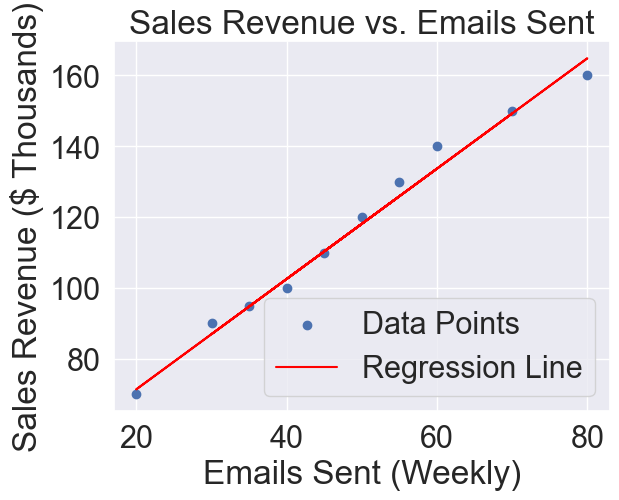

In [78]:
import numpy as np
from sklearn.linear_model import LinearRegression
def Visualizes(data: pd.DataFrame, X: np.ndarray, lr: LinearRegression) -> None:
    """
    Visualizes the relationship between emails sent and sales revenue with a regression line.

    Args:
        data: DataFrame containing the dataset with 'Emails Sent (Weekly)' and 'Sales Revenue ($ Thousands)' columns.
        X: Feature array for prediction.
        model: Trained LinearRegression model.
    """
    import matplotlib.pyplot as plt
    try:
        plt.scatter(data['Emails Sent (Weekly)'], data['Sales Revenue ($ Thousands)'], label='Data Points')
        plt.plot(X, lr.predict(X), color='red', label='Regression Line')
        plt.xlabel('Emails Sent (Weekly)')
        plt.ylabel('Sales Revenue ($ Thousands)')
        plt.legend()
        plt.title('Sales Revenue vs. Emails Sent')
        plt.show()
    except Exception as e:
        print(f"Error: {e}")
        
Visualizes(data, X, lr)

# Find the slope and intercept

In [79]:
from typing import Tuple
def Find_Coef_Intercept(lr:LinearRegression)->Tuple[np.ndarray, float]:
     
     try:
          m = lr.coef_
          b = lr.intercept_
          return m, b
     
     except Exception as e:
          print(f"Error: {e}")
          return None, None
     
m, b = Find_Coef_Intercept(lr)
print(f"The value of m : {m} and The value of b : {b}")

The value of m : [1.55660377] and The value of b : 40.29481132075475


In [80]:
from typing import Tuple
import numpy as np
from sklearn.linear_model import LinearRegression

def Find_Coef_Intercept(lr: LinearRegression) -> Tuple[np.ndarray, float]:
    """
    Extracts the slope and intercept from a trained LinearRegression model.

    Args:
        model: Trained LinearRegression model.

    Returns:
        Tuple containing the slope (m) and intercept (b).
    """
    try:
        m = lr.coef_
        b = lr.intercept_
        return m, b
    except Exception as e:
        print(f"Error: {e}")
        return None, None
   
Find_Coef_Intercept(lr)

(array([1.55660377]), 40.29481132075475)

# Predict the value

In [81]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
def Predicts(lr:LinearRegression)->float:
     
     try:
          import numpy as np
          emails_new = np.array([[65]])
          prediction_sales = lr.predict(emails_new)[0]
          return prediction_sales
     
     except Exception as e:
          print(f"Error: {e}")
          return None
     
Predicts(lr)

141.4740566037736

# Problem 2 

- Predicting Exam Scores Based on Study Hours
- Scenario: A teacher collects data on the number of hours students study for an exam and their corresponding exam scores 
             (out of100). 
- The teacher wants to predict scores based on study time to guide students better.


In [82]:
import pandas as pd
import numpy as np
def Random_data(data:pd.DataFrame)->pd.DataFrame:
     
     try:
          import numpy as np
          np.random.seed(42)
          data = {
               "Hours":np.random.uniform(1, 10, 100),
               "Score":np.random.uniform(50, 100, 100)
          }
          return pd.DataFrame(data)
     except Exception as e:
          print(f"Error: {e}")
          return None
     
df = Random_data(data)
df 

,Hours,Score
0,4.370861,51.571459
1,9.556429,81.820521
2,7.587945,65.717799
3,6.387926,75.428535
4,2.404168,95.378324
...,...,...
95,5.444160,67.460479
96,5.704595,86.297784
97,4.847869,94.855513
98,1.228772,94.354321


# Visualize the data on scatter plot

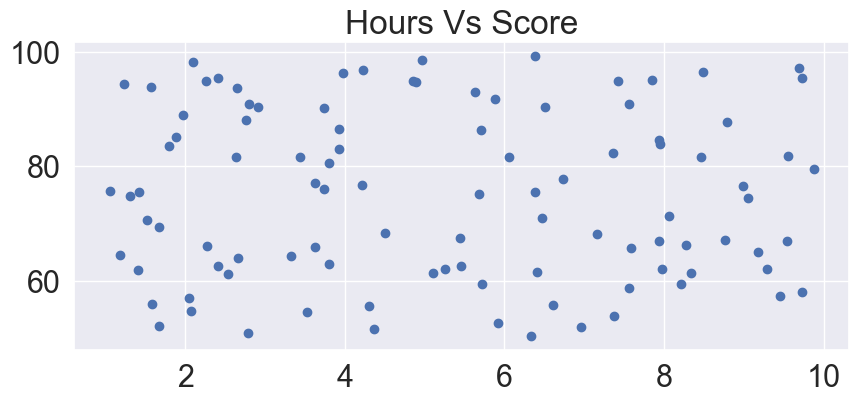

In [83]:
def Scatters(df:pd.DataFrame)->None:
     
     try:
          import matplotlib.pyplot as plt
          plt.figure(figsize=(10, 4))
          plt.scatter(df['Hours'],
                      df['Score'],
                      label = 'data points'
                    )
          plt.title("Hours Vs Score")
          plt.show()
          
     except Exception as e:
          print(f"Errors: {e}")
          
          return None
     
Scatters(df)

# Split into X and y

In [84]:
def Split_X(df:pd.DataFrame)->pd.DataFrame:
     
     try:
          
          X = df.iloc[:, 0:1]
          # y = df.Score
          
          return X
     
     except Exception as e:
          
          print(f"Errors:{e}")
          
          return None
     
def Split_Y(df:pd.DataFrame)->pd.Series:
     
     try:
          
          y = df.Score
          
          return y
     
     except Exception as e:
          print(f"Error: {e}")
          return None
     
X = Split_X(df)
X
     

,Hours
0,4.370861
1,9.556429
2,7.587945
3,6.387926
4,2.404168
...,...
95,5.444160
96,5.704595
97,4.847869
98,1.228772


In [85]:
y = Split_Y(df)
y

0     51.571459
1     81.820521
2     65.717799
3     75.428535
4     95.378324
        ...    
95    67.460479
96    86.297784
97    94.855513
98    94.354321
99    88.993777
Name: Score, Length: 100, dtype: float64

In [86]:
def Train_Test_Split(X:pd.DataFrame, y:pd.DataFrame):
     
     try:
          from sklearn.model_selection import train_test_split
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
          return X_train, X_test, y_train, y_test
     
     except AttributeError:
          raise AttributeError("Error:")
     
     except Exception as e:
          print(f"Error: {e}")
          return None, None, None, None
     
     
def Fit_All_Models(X_train:pd.DataFrame,
                   y_train:pd.Series
                   ):
     
     try:
          
          from sklearn.linear_model import LinearRegression
          lr = LinearRegression()
          model = lr.fit(X_train, y_train)
          return model
     
     except Exception as e:
          print(f"Error: {e}")
          return None, None
     

X_train, X_test, y_train, y_test = Train_Test_Split(X, y)    

In [87]:
model = Fit_All_Models(X_train, y_train)
model

LinearRegression()

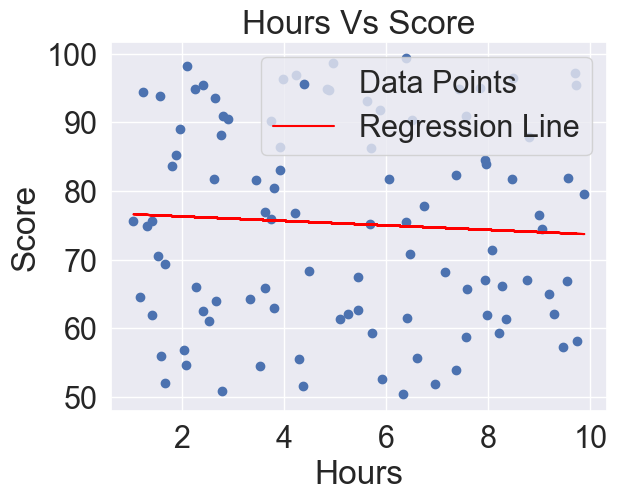

In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression
def Visualized(df: pd.DataFrame, X: np.ndarray, model: LinearRegression) -> None:
    """
    Visualizes the relationship between emails sent and sales revenue with a regression line.

    Args:
        data: DataFrame containing the dataset with 'Emails Sent (Weekly)' and 'Sales Revenue ($ Thousands)' columns.
        X: Feature array for prediction.
        model: Trained LinearRegression model.
    """
    import matplotlib.pyplot as plt
    try:
        plt.scatter(df['Hours'], df['Score'], label='Data Points')
        plt.plot(X, model.predict(X), color='red', label='Regression Line')
        plt.xlabel('Hours')
        plt.ylabel('Score')
        plt.legend()
        plt.title('Hours Vs Score')
        plt.show()
    except Exception as e:
        print(f"Error: {e}")
        
Visualized(df, X, model)

In [89]:
def Intercept_Slope(model : LinearRegression)->Tuple[np.ndarray, float]:
     
     try:
          
          Beta = model.coef_
          Slope = model.intercept_
          Tabular = {'beta':Beta,
                     'slope':Slope
                    }
          
          return pd.DataFrame(Tabular, index = ['b', 'm'])
     
     
     except Exception as e:
          print(f"Error: {e}")
          return None
     
     
Tabular = Intercept_Slope(model)
Tabular

,beta,slope
b,-0.325598,76.922824
m,-0.325598,76.922824


In [90]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
def Predicted(model:LinearRegression)->float:
     
     try:
          import numpy as np
          hours_new = np.array([[7]])
          prediction_sales = model.predict(hours_new)[0]
          
          return pd.DataFrame({'prediction' : prediction_sales}, index=['Predcted_Hours'])
     
     except Exception as e:
          print(f"Error: {e}")
          return None
     
Predicted(model)

,prediction
Predcted_Hours,74.643636
